# 🦠 COVID-19 Project

<div style="display: flex; gap: 10px;">
  <img src="https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExcXJvamdsbWEzNmVsbWExb3lkcnZnMnFiN3o5aHI2dGs2OHlibGRtcyZlcD12MV9zdGlja2Vyc19zZWFyY2gmY3Q9cw/LnpF27wlTv6yoQV4mL/giphy.gif" alt="Coronavirus Animation" width="350">
</div>


In [ ]:
#!pip install ydata_profiling
import pandas as pd
from ydata_profiling import ProfileReport

In [ ]:
df=pd.read_csv(r"/content/WHO-COVID-19-global-daily-data.csv")
profile=ProfileReport(df,title="Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 8/8 [00:01<00:00,  4.34it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-04,AI,Anguilla,AMR,NaN,0.0,NaN,0.0
1,2020-01-04,AZ,Azerbaijan,EUR,NaN,0.0,NaN,0.0
2,2020-01-04,BD,Bangladesh,SEAR,0.0,0.0,0.0,0.0
3,2020-01-04,BB,Barbados,AMR,NaN,0.0,NaN,0.0
4,2020-01-04,BR,Brazil,AMR,NaN,0.0,NaN,0.0


In [ ]:
df.columns= df.columns.str.lower()

In [ ]:
all(column == column.lower() for column in df.columns)

True

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119634 entries, 0 to 119633
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   date_reported      119634 non-null  object 
 1   country_code       119135 non-null  object 
 2   country            119633 non-null  object 
 3   who_region         119633 non-null  object 
 4   new_cases          77859 non-null   float64
 5   cumulative_cases   119633 non-null  float64
 6   new_deaths         58071 non-null   float64
 7   cumulative_deaths  119633 non-null  float64
dtypes: float64(4), object(4)
memory usage: 7.3+ MB


In [ ]:
df.describe()

,new_cases,cumulative_cases,new_deaths,cumulative_deaths
count,77859.000000,1.196330e+05,58071.000000,119633.000000
mean,2073.912342,1.989442e+05,60.971673,5133.541514
std,12376.537089,1.290433e+06,256.124082,27394.536350
min,-8261.000000,0.000000e+00,-60.000000,0.000000
25%,3.000000,1.100000e+01,0.000000,0.000000
50%,54.000000,1.694000e+03,3.000000,29.000000
75%,607.000000,3.284000e+04,18.000000,591.000000
max,414188.000000,3.257550e+07,6460.000000,584001.000000


In [ ]:
import plotly.figure_factory as ff

# ----------------------------
# Summary للأعمدة الرقمية
summary_num = df.describe().applymap(lambda x: f"{x:,.0f}")
summary_num.insert(0, "Statistic", summary_num.index)  # إضافة عمود labels
fig1 = ff.create_table(summary_num, height_constant=20)
fig1.update_layout(width=800, height=300, margin=dict(l=10, r=10, t=10, b=10))
# إضافة عنوان للجدول
fig1.update_layout(
    title_text="📊 Numeric Columns Summary",
    title_x=0.5,  # توسيط العنوان
    margin=dict(t=50, l=20, r=20, b=20)
)
fig1.show()

# ----------------------------
# Summary للأعمدة النصية (Object)
summary_obj = df.describe(include="O")
summary_obj.insert(0, "Statistic", summary_obj.index)  # إضافة عمود labels
fig2 = ff.create_table(summary_obj, height_constant=20)
fig2.update_layout(width=800, height=300, margin=dict(l=10, r=10, t=10, b=10))
# إضافة عنوان للجدول
fig2.update_layout(
    title_text="🔤 Categorical Columns Summary",
    title_x=0.5,  # توسيط العنوان
    margin=dict(t=50, l=20, r=20, b=20)
)
fig2.show()


/tmp/ipython-input-2373274895.py:5: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



In [ ]:
round(df.isna().mean() * 100 ,2)

,0
date_reported,0.0
country_code,0.4
country,0.0
who_region,0.0
new_cases,34.9
cumulative_cases,0.0
new_deaths,51.5
cumulative_deaths,0.0


In [ ]:
df.fillna(0, inplace=True)

In [ ]:
df.isna().sum()

,0
date_reported,0
country_code,0
country,0
who_region,0
new_cases,0
cumulative_cases,0
new_deaths,0
cumulative_deaths,0


In [ ]:
df['date_reported'] = pd.to_datetime(df['date_reported'], errors='coerce')
print(df['date_reported'].dtype)

datetime64[ns]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119634 entries, 0 to 119633
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   date_reported      119633 non-null  datetime64[ns]
 1   country_code       119634 non-null  object        
 2   country            119634 non-null  object        
 3   who_region         119634 non-null  object        
 4   new_cases          119634 non-null  float64       
 5   cumulative_cases   119634 non-null  float64       
 6   new_deaths         119634 non-null  float64       
 7   cumulative_deaths  119634 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 7.3+ MB


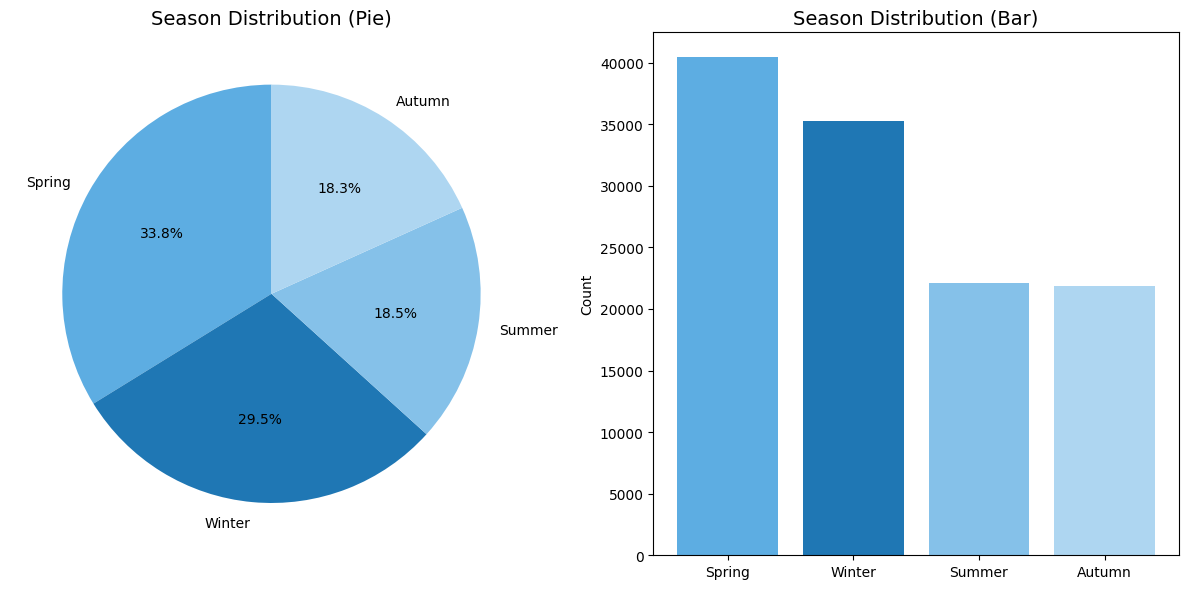

In [ ]:
import matplotlib.pyplot as plt

# تعريف الألوان لكل موسم (ثابتة)
season_colors = {
    "Winter": "#1f77b4",  # أزرق داكن
    "Spring": "#5dade2",  # أزرق متوسط
    "Summer": "#85c1e9",  # لبني فاتح
    "Autumn": "#aed6f1"   # سماوي أفتح
}

# حساب التوزيع
season_counts = df['season'].value_counts()

# تجهيز الشكل
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart
axes[0].pie(
    season_counts,
    labels=season_counts.index,
    autopct='%1.1f%%',
    colors=[season_colors[season] for season in season_counts.index],
    startangle=90
)
axes[0].set_title("Season Distribution (Pie)", fontsize=14)

# Bar chart
axes[1].bar(
    season_counts.index,
    season_counts.values,
    color=[season_colors[season] for season in season_counts.index]
)
axes[1].set_title("Season Distribution (Bar)", fontsize=14)
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()


In [ ]:
import plotly.graph_objects as go

# إنشاء الشكل
fig = go.Figure()

# رسم Total New Cases
fig.add_trace(go.Scatter(
    x=season_summary['season'],
    y=season_summary['new_cases'],
    mode='lines+markers',
    name='Total New Cases',
    line=dict(color='#85C1E9', width=3),
    marker=dict(size=10)
))

# رسم Total Deaths
fig.add_trace(go.Scatter(
    x=season_summary['season'],
    y=season_summary['new_deaths'],
    mode='lines+markers',
    name='Total Deaths',
    line=dict(color='#1F618D', width=3),
    marker=dict(size=10)
))

# إعدادات الشكل
fig.update_layout(
    title='Total New Cases & Deaths per Season',
    xaxis_title='Season',
    yaxis_title='Count',
    template='plotly_white'
)

fig.show()


In [ ]:
import plotly.graph_objects as go

# Group by Region and Season
region_season_summary = df.groupby(['who_region','season'])[['new_cases','new_deaths']].sum().reset_index()

# ترتيب المواسم
season_order = ['Winter','Spring','Summer','Autumn']

# إنشاء الشكل
fig = go.Figure()

# لكل Region نضيف خط لكل نوع بيانات
for region in region_season_summary['who_region'].unique():
    df_region = region_season_summary[region_season_summary['who_region'] == region].set_index('season').reindex(season_order)

    # New Cases
    fig.add_trace(go.Scatter(
        x=df_region.index,
        y=df_region['new_cases'],
        mode='lines+markers',
        name=f'{region} - New Cases',
        line=dict(width=2),
        marker=dict(size=8)
    ))

    # Deaths
    fig.add_trace(go.Scatter(
        x=df_region.index,
        y=df_region['new_deaths'],
        mode='lines+markers',
        name=f'{region} - Deaths',
        line=dict(width=2, dash='dash'),  # خط متقطع للوفيات
        marker=dict(size=8)
    ))

# إعداد الشكل
fig.update_layout(
    title='Total New Cases & Deaths per Season by WHO Region',
    xaxis_title='Season',
    yaxis_title='Count',
    template='plotly_white'
)

fig.show()
